In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

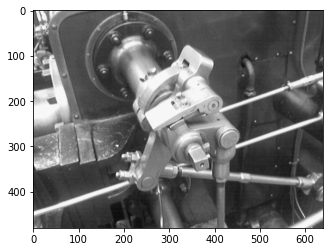

In [2]:
img=cv2.imread('images/machine.png',0)
plt.imshow(img,'gray')
plt.show()

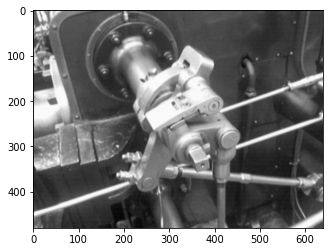

In [3]:
img_pad=np.asarray(cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_CONSTANT,value=0))
img_blur=np.zeros_like(img)
# kernel=np.array([
#     [1,4,6,4,1],
#     [4,16,24,16,4],
#     [6,24,36,24,6],
#     [4,16,24,16,4],
#     [1,4,6,4,1]])
kernel=np.array([[1,1,1],[1,1,1],[1,1,1]])
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_blur[i,j]=np.sum(img_pad[i:i+kernel.shape[0],j:j+kernel.shape[1]]*kernel)//np.sum(kernel)
plt.imshow(img_blur,'gray')
plt.show()

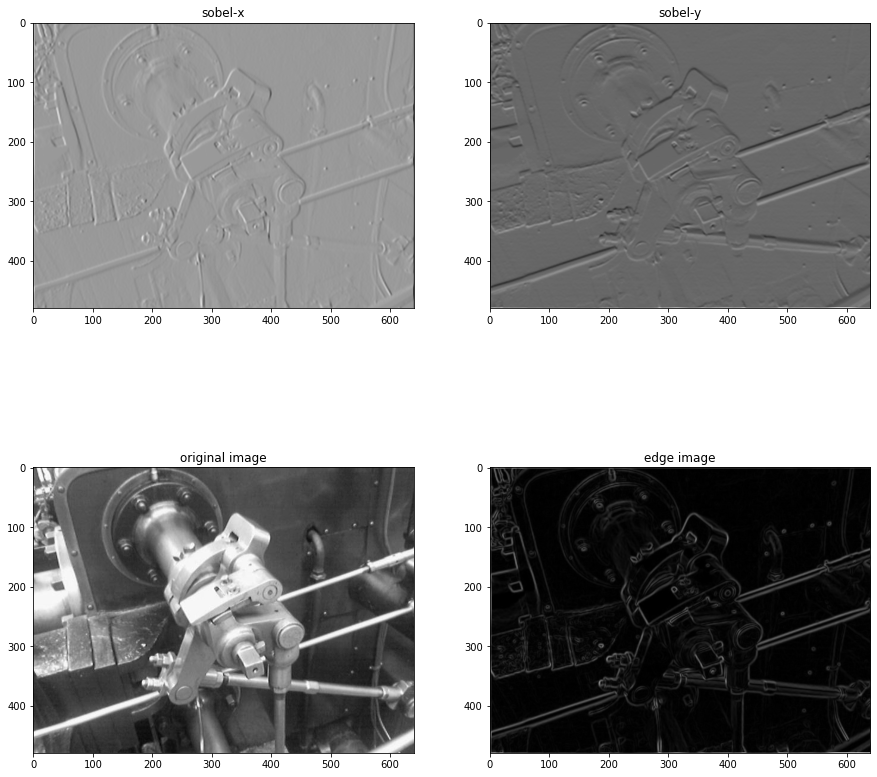

In [4]:
###########      Edge Detection (Sobel)      ###################
sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
img_blur_pad=cv2.copyMakeBorder(img_blur,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
sx=np.zeros(img.shape)
sy=np.zeros(img.shape)
edge_sobel=np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        sx[i,j]=np.sum(img_blur_pad[i:i+3,j:j+3]*sobel_x)
        sy[i,j]=np.sum(img_blur_pad[i:i+3,j:j+3]*sobel_y)
        edge_sobel[i,j]=round(math.sqrt(sy[i,j]*sy[i,j] + sx[i,j]*sx[i,j]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        edge_sobel[i,j]=edge_sobel[i,j] / edge_sobel.max() *255
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(sx,'gray')
plt.title('sobel-x')

plt.subplot(2,2,2)
plt.imshow(sy,'gray')
plt.title('sobel-y')

plt.subplot(2,2,3)
plt.imshow(img,'gray')
plt.title('original image')

plt.subplot(2,2,4)
plt.imshow(edge_sobel,'gray')
plt.title('edge image')
plt.show()